In [234]:
#import libraries
# Import the libraries
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')




In [294]:
#Importing dataset
df= pd.read_csv(r'C:/Users/Sachin/Downloads/ADMN5015 FINAL PROJECT DATASET.csv',encoding= 'unicode_escape') 
df

,tweet_id,airline,name,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11.35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11.15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11.15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11.15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11.14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...
14635,5.700000e+17,American,KristenReenders,@AmericanAir thank you we got on a different f...,NaN,22-02-2015 12.01,NaN,NaN
14636,5.700000e+17,American,itsropes,@AmericanAir leaving over 20 minutes Late Flig...,NaN,22-02-2015 11.59,Texas,NaN
14637,5.700000e+17,American,sanyabun,@AmericanAir Please bring American Airlines to...,NaN,22-02-2015 11.59,"Nigeria,lagos",NaN
14638,5.700000e+17,American,SraJackson,"@AmericanAir you have my money, you change my ...",NaN,22-02-2015 11.59,New Jersey,Eastern Time (US & Canada)


In [295]:
#Dropping all columns except airline and text
df2=df.text
df2 = df.drop(df.columns[[0,2,4,5,6,7]], axis=1)

In [296]:
#Cleaning up the datatset

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

df2['text'] = df2['text'].apply(cleanUpTweet)
df2

,airline,text
0,Virgin America,What said.
1,Virgin America,plus you've added commercials to the experien...
2,Virgin America,I didn't today... Must mean I need to take an...
3,Virgin America,"it's really aggressive to blast obnoxious ""en..."
4,Virgin America,and it's a really big bad thing about it
...,...,...
14635,American,thank you we got on a different flight to Chi...
14636,American,leaving over 20 minutes Late Flight. No warni...
14637,American,Please bring American Airlines to BlackBerry10
14638,American,"you have my money, you change my flight, and ..."


In [297]:
# Function to calculate subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Function to calculate polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [298]:
#Calculating subjectivity and polarity
df2['Subjectivity'] = df2['text'].apply(getSubjectivity)
df2['Polarity'] = df2['text'].apply(getPolarity)


In [299]:
#Dropping empty values
df2 = df2.drop(df2[df2['text'] == ''].index)


In [300]:
# Sentiment analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"
    
df2['Sentiment'] = df2['Polarity'].apply(getTextAnalysis)

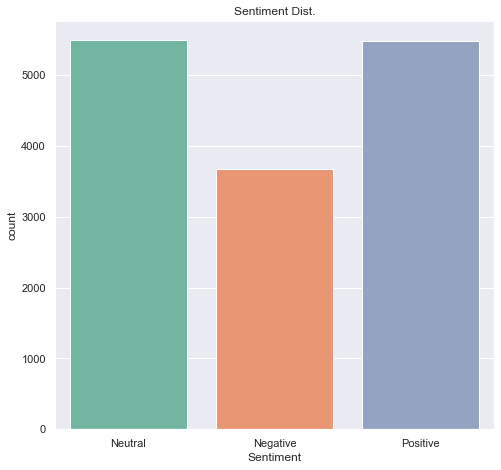

In [301]:
#EDA
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(x=df2["Sentiment"],palette="Set2")
plt.title("Sentiment Dist.")
plt.show()

In [ ]:
#From the plot above we can see that the overall sentiment of the tweets remain neutral or positive.

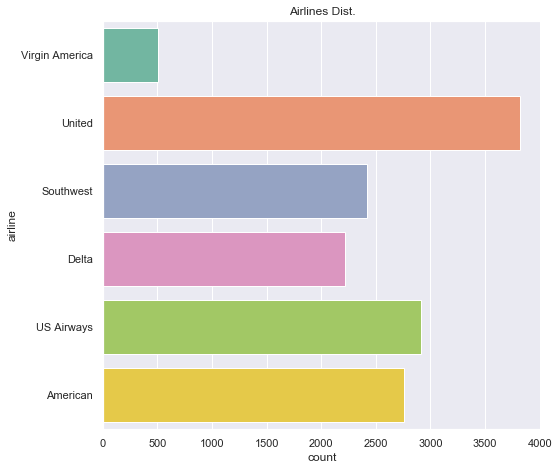

In [303]:
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(y=df2["airline"],palette="Set2")
plt.title("Airlines Dist.")
plt.show()

In [ ]:
#Sorting by tweet count the plot above tells us that united airlines is quite popular on twitter.
#But this could be either bad press or good press

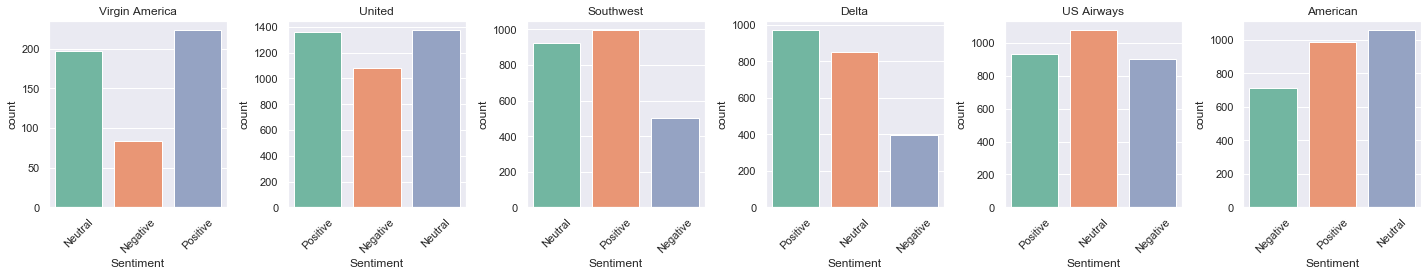

In [305]:
j=1
plt.subplots(figsize=(20,4),tight_layout=True)
for i in df2["airline"].unique():
        x = df2[df2["airline"]==i]
        plt.subplot(1, 6, j)
        sns.countplot(x["Sentiment"],palette="Set2")
        plt.xticks(rotation=45)
        plt.title(i)
        j +=1
plt.show()

In [ ]:
#The plot above shows us the tweet sentiments by company
#With further analysis we can say that feelings towards united airline is pretty mixed.
#However in contrast virgin america and delta has more positive sentiment

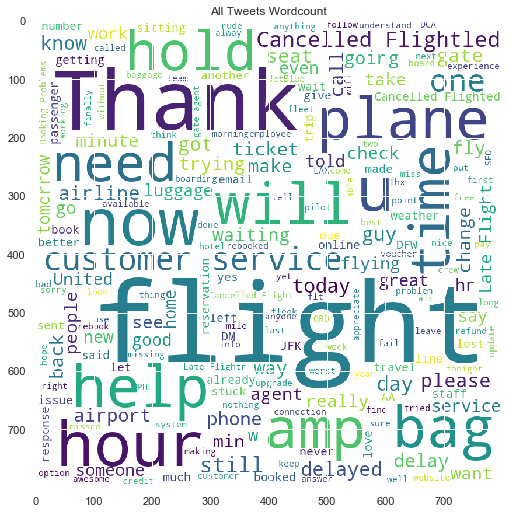

In [306]:
#Word Cloud
allcomments = " ".join(df2.text)
wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 12).generate(allcomments) 
      
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.title("All Tweets Wordcount")
plt.show()

In [ ]:
#looking at this wordclud we can see that some of the most used phrases are thank you,flight,help,hour,bag,hold,cancelled flight.

In [308]:
#Transforming sentiments to numeric
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2["Sentiment"] = encoder.fit_transform(df2["Sentiment"])
print(encoder.classes_)
df2.head()

[0 1 2]


,airline,text,Subjectivity,Polarity,Sentiment
0,Virgin America,What said.,0.000000,0.000000,1
1,Virgin America,plus you've added commercials to the experien...,0.000000,0.000000,1
2,Virgin America,I didn't today... Must mean I need to take an...,0.687500,-0.390625,0
3,Virgin America,"it's really aggressive to blast obnoxious ""en...",0.350000,0.006250,2
4,Virgin America,and it's a really big bad thing about it,0.383333,-0.350000,0


In [309]:
# converting to categorical  
df_dummy = df2.copy()
df_dummy.airline = pd.Categorical(df_dummy.airline)
x = df_dummy[['airline']]
del df_dummy['airline']
dummies = pd.get_dummies(x, prefix = 'airline')
df2 = pd.concat([df_dummy,dummies], axis=1)
df2.head()

,text,Subjectivity,Polarity,Sentiment,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,What said.,0.000000,0.000000,1,0,0,0,0,0,1
1,plus you've added commercials to the experien...,0.000000,0.000000,1,0,0,0,0,0,1
2,I didn't today... Must mean I need to take an...,0.687500,-0.390625,0,0,0,0,0,0,1
3,"it's really aggressive to blast obnoxious ""en...",0.350000,0.006250,2,0,0,0,0,0,1
4,and it's a really big bad thing about it,0.383333,-0.350000,0,0,0,0,0,0,1


In [310]:
#Encoding Words
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = "english")
encoded_X = vectorizer.fit_transform(df2.text).toarray()
print(encoded_X.shape)
print("Features First 100:",vectorizer.get_feature_names()[:100])

(14640, 12785)
Features First 100: ['00', '000', '000114', '000419', '000ft', '000lbs', '0011', '0016', '00a', '00am', '00p', '00pm', '01', '0162389030167', '0162424965446', '0162431184663', '0167560070877', '0185', '01pm', '02', '0200', '03', '0316', '0372389047497', '04', '0400', '05', '0510', '0530', '05am', '05pm', '06', '0600', '0638', '0671', '07', '0736', '0769', '07p', '08', '0985', '0_0', '10', '100', '1000', '1000cost', '1001', '1002', '1007', '1008', '101', '1016', '1019', '1020', '1024', '1025', '1027', '1028', '103', '1030pm', '1032', '1038', '104', '1041', '1046', '105', '1050', '1051', '1058', '106', '1065', '1071', '1074', '1079871763', '108', '1080', '1081', '1086', '108639', '1089', '1098', '1099', '10a', '10am', '10d', '10f', '10hrs', '10m', '10min', '10mins', '10p', '10pm', '10th', '10voucherwhatajoke', '10x', '10x9x17', '10yr', '11', '110', '1101']


In [311]:
data2 = df2.copy()
del data2["text"]
data2 = pd.concat([pd.DataFrame(encoded_X),data2], axis=1)
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,12784,Subjectivity,Polarity,Sentiment,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,1,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,1,0,0,0,0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.687500,-0.390625,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.350000,0.006250,2,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.383333,-0.350000,0,0,0,0,0,0,1


In [312]:
X = data2.drop(["Sentiment"],axis=1)
y = data2.Sentiment

In [313]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=22)
print("Train :",X_train.shape)
print("Test  :",X_test.shape)

Train : (10980, 12793)
Test  : (3660, 12793)


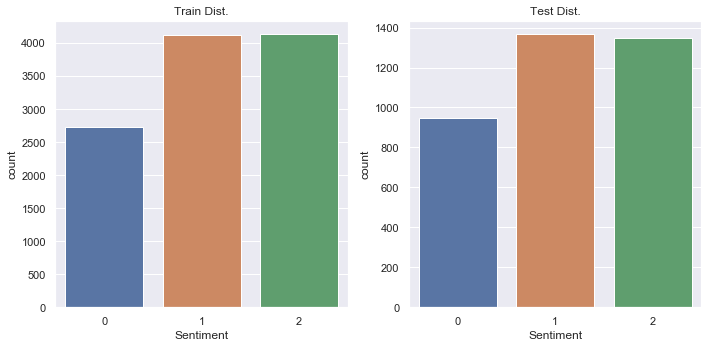

In [314]:
#Checking the distribution
sns.set()
plt.subplots(figsize=(10,5),tight_layout=True)
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.title("Train Dist.")
plt.subplot(1,2,2)
sns.countplot(y_test)
plt.title("Test Dist.")
plt.show()

In [ ]:
#The distribution looks reprentative

In [315]:
#Classification using random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [317]:
#Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

rf_acc = accuracy_score(y_test, pred)
rf_f1 = f1_score(y_test, pred, average="micro")

print("Accuracy : %",round(rf_acc*100,2))
print("F1 Score : %",round(rf_f1*100,2))

Accuracy : % 99.4
F1 Score : % 99.4
